# Project Title: Customer Behavior Analysis in E-commerce

## Introduction

In this project, we're exploring customer behavior in online shopping from various angles. We're examining data on customer demographics, purchasing patterns, and churn rates to gain a comprehensive understanding of their behavior. Our objective is not just to analyze churn but also to explore different aspects of customer behavior. By doing so, we aim to provide comprehensive insights that will inform strategic decisions and optimize our e-commerce business.

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,08-09-2020 09:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,05-03-2022 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,23-05-2022 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,12-11-2020 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,27-11-2020 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,10-08-2023 13:39,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,23-11-2021 01:30,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,02-07-2020 14:04,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,30-12-2020 02:02,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


**Data Transformation** <br>
- Converted the "Purchase Date" column to datetime format.<br>
- Dropped the "Customer Age" column for redundancy.

In [4]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [6]:
df.drop("Customer Age",axis=1,inplace=True)

In [7]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-08-09 09:38:00,Electronics,12,3,740,Credit Card,0.0,Christine Hernandez,37,Male,0
1,46251,2022-05-03 12:56:00,Home,468,4,2739,PayPal,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:00,Home,288,2,3196,PayPal,0.0,Christine Hernandez,37,Male,0
3,46251,2020-12-11 13:13:00,Clothing,196,1,3509,PayPal,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:00,Home,449,1,3452,Credit Card,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-10-08 13:39:00,Clothing,279,2,2187,PayPal,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:00,Home,27,1,3615,Credit Card,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-02-07 14:04:00,Home,17,5,2466,Cash,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:00,Books,398,2,3668,Crypto,0.0,Jennifer Cooper,34,Female,1


**Handling Missing Values:** <br>
- Checked for missing values and filled NAs in the "Returns" column with the mode value.

In [8]:
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [9]:
df["Returns"].fillna(df["Returns"].mode()[0],inplace=True)

In [10]:
df.isna().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [11]:
new_order = ["Customer ID","Customer Name","Age","Gender","Purchase Date","Product Category","Product Price","Quantity","Total Purchase Amount","Payment Method","Returns","Churn"]

In [12]:
df = df.reindex(columns=new_order)

## Exploratory Data Analysis (EDA)

**Descriptive Statistics**

- Provided descriptive statistics for numerical attributes such as product price, quantity, total purchase amount, returns, age, and churn rate.

In [13]:
df.describe()

,Customer ID,Age,Product Price,Quantity,Total Purchase Amount,Returns,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,43.940528,254.659512,2.998896,2725.370732,0.403076,0.199496
std,14428.27959,15.350246,141.568577,1.414694,1442.933565,0.490517,0.399622
min,1.00000,18.000000,10.000000,1.000000,100.000000,0.000000,0.000000
25%,12497.75000,31.000000,132.000000,2.000000,1477.000000,0.000000,0.000000
50%,25018.00000,44.000000,255.000000,3.000000,2724.000000,0.000000,0.000000
75%,37506.00000,57.000000,377.000000,4.000000,3974.000000,1.000000,0.000000
max,50000.00000,70.000000,500.000000,5.000000,5350.000000,1.000000,1.000000


<!-- Customer ID:
The count indicates that there are 249,947 unique customer IDs in the dataset.
There's a wide range of customer IDs from 1 to 50,000, suggesting a large customer base.

Product Price:
The mean product price is approximately $254.66, with a standard deviation of $141.57.
The minimum price is $10, and the maximum price is $500, indicating a diverse range of products with varying price points.

Quantity:
The mean quantity of products purchased per transaction is approximately 3.
The minimum quantity is 1, and the maximum quantity is 5, suggesting that most transactions involve purchasing a moderate number of items.

Total Purchase Amount:
The mean total purchase amount per transaction is approximately $2,725.50, with a standard deviation of $1,442.93.
The minimum total purchase amount is $100, and the maximum total purchase amount is $5,350.

Returns:
The mean return rate is approximately 40.31%, indicating that a significant portion of transactions involve returns.
The column is binary, with 0 representing no return and 1 representing a return.

Age:
The mean age of customers is approximately 43.94 years.
The minimum age is 18 years, and the maximum age is 70 years, suggesting a diverse customer demographic.

Churn:
The mean churn rate is approximately 19.95%, indicating that around 20% of customers have churned.
The column is binary, with 0 representing retained customers and 1 representing churned customers. -->

#### Customer ID:
There's a wide range of customer IDs from 1 to 50,000, suggesting a large customer base.

#### Product Price:
- The mean product price is approximately $254.66, with a standard deviation of $141.57.
- The minimum price is $10, and the maximum price is $500, indicating a diverse range of products with varying price points.

#### Quantity:
On average, customers purchase around 3 items per transaction, with a standard deviation of about 1.41.

#### Total Purchase Amount:
- The mean total purchase amount per transaction is approximately $2,725.37, with a standard deviation of $1442.93.
- The minimum total purchase amount is $100, and the maximum total purchase amount is $5,350.

#### Returns:
On average, about 40.31% of transactions result in returns, with a standard deviation of 49.05%. This suggests that returns are quite common in the dataset.

#### Age:
- The mean age of customers is approximately 43 years.
- The minimum age is 18 years, and the maximum age is 70 years, suggesting a diverse customer demographic.

#### Churn:
About 19.95% of customers have churned (i.e., stopped using the product), with a standard deviation of 39.96%.
The column is binary, with 0 representing retained customers and 1 representing churned customers.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Customer Name          250000 non-null  object        
 2   Age                    250000 non-null  int64         
 3   Gender                 250000 non-null  object        
 4   Purchase Date          250000 non-null  datetime64[ns]
 5   Product Category       250000 non-null  object        
 6   Product Price          250000 non-null  int64         
 7   Quantity               250000 non-null  int64         
 8   Total Purchase Amount  250000 non-null  int64         
 9   Payment Method         250000 non-null  object        
 10  Returns                250000 non-null  float64       
 11  Churn                  250000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), 

**Product Analysis**

- Analyzed product categories in terms of average quantity sold and churn rates.

In [15]:
df["Product Category"].unique()

array(['Electronics', 'Home', 'Clothing', 'Books'], dtype=object)

In [16]:
df["Product Category"].value_counts().sort_values(ascending=False)

Clothing       75052
Books          74912
Electronics    50185
Home           49851
Name: Product Category, dtype: int64

In [17]:
avg_quantity = df.groupby("Product Category")["Quantity"].mean()
avg_quantity

Product Category
Books          2.988520
Clothing       3.002212
Electronics    3.005440
Home           3.002909
Name: Quantity, dtype: float64

Books: 2.988520 <br>
Clothing: 3.002212 <br>
Electronics: 3.005440 <br>
Home: 3.002909 <br>
These values represent the average quantity of products sold in each category.

In [18]:
df.head()

,Customer ID,Customer Name,Age,Gender,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Churn
0,46251,Christine Hernandez,37,Male,2020-08-09 09:38:00,Electronics,12,3,740,Credit Card,0.0,0
1,46251,Christine Hernandez,37,Male,2022-05-03 12:56:00,Home,468,4,2739,PayPal,0.0,0
2,46251,Christine Hernandez,37,Male,2022-05-23 18:18:00,Home,288,2,3196,PayPal,0.0,0
3,46251,Christine Hernandez,37,Male,2020-12-11 13:13:00,Clothing,196,1,3509,PayPal,0.0,0
4,13593,James Grant,49,Female,2020-11-27 17:55:00,Home,449,1,3452,Credit Card,0.0,1


**Churn Analysis**

- Explored factors influencing customer churn, including correlations with age, gender, purchase behavior, and satisfaction

In [19]:
churn_rate = df.groupby("Product Category")["Churn"].mean().sort_values(ascending=False)
churn_rate

Product Category
Home           0.202022
Books          0.199247
Electronics    0.198844
Clothing       0.198502
Name: Churn, dtype: float64

Home: 20.20% <br>
Books: 19.92% <br>
Electronics: 19.88% <br>
Clothing: 19.85% 

In [20]:
churn_rate = df.groupby("Product Category")["Churn"].value_counts().sort_values(ascending=False)
churn_rate

Product Category  Churn
Clothing          0        60154
Books             0        59986
Electronics       0        40206
Home              0        39780
Books             1        14926
Clothing          1        14898
Home              1        10071
Electronics       1         9979
Name: Churn, dtype: int64

#### "Home" category has the highest churn rate may indicate several potential behaviors or factors affecting customer churn:

1. Product Satisfaction:
   - One possible interpretation is that customers who purchased products in the "Home" category may have been less satisfied with their purchases compared to customers in other categories. This dissatisfaction could lead to a higher likelihood of churn.

2. Product Lifespan:
   - Another interpretation could be related to the nature of the products within the "Home" category. Some home products, such as appliances or furniture, may have longer lifespans compared to other product categories like clothing or books. As a result, customers may not need to purchase home products as frequently, leading to a higher churn rate as fewer repeat purchases are made within a given time period.

3. Market Trends:
   - External factors such as changing consumer preferences, economic conditions, or market trends could also influence the churn rate within the "Home" category. For example, shifts in housing trends or lifestyle preferences may impact the demand for certain home products, influencing churn behavior.

4. Competitive Landscape:
   - The level of competition and availability of alternatives within the "Home" category could also affect churn rates. If customers have access to a wide range of alternatives or competitors offering similar products, they may be more inclined to switch providers or brands, leading to higher churn.

5. Customer Expectations:
   - The churn rate within the "Home" category could also reflect discrepancies between customer expectations and the actual product experience. If customers' expectations are not met in terms of product quality, functionality, or service, they may be more likely to churn.


In [22]:
churn_correlation = df.corr()['Churn'].sort_values(ascending=False)
print(churn_correlation)

Churn                    1.000000
Returns                  0.001387
Total Purchase Amount    0.000770
Product Price           -0.001666
Quantity                -0.002674
Customer ID             -0.005398
Age                     -0.006015
Name: Churn, dtype: float64


In [23]:
df

,Customer ID,Customer Name,Age,Gender,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Churn
0,46251,Christine Hernandez,37,Male,2020-08-09 09:38:00,Electronics,12,3,740,Credit Card,0.0,0
1,46251,Christine Hernandez,37,Male,2022-05-03 12:56:00,Home,468,4,2739,PayPal,0.0,0
2,46251,Christine Hernandez,37,Male,2022-05-23 18:18:00,Home,288,2,3196,PayPal,0.0,0
3,46251,Christine Hernandez,37,Male,2020-12-11 13:13:00,Clothing,196,1,3509,PayPal,0.0,0
4,13593,James Grant,49,Female,2020-11-27 17:55:00,Home,449,1,3452,Credit Card,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,Michelle Flores,55,Male,2023-10-08 13:39:00,Clothing,279,2,2187,PayPal,1.0,1
249996,48835,Jeremy Rush,42,Female,2021-11-23 01:30:00,Home,27,1,3615,Credit Card,1.0,1
249997,21019,Tina Craig,41,Male,2020-02-07 14:04:00,Home,17,5,2466,Cash,0.0,0
249998,49234,Jennifer Cooper,34,Female,2020-12-30 02:02:00,Books,398,2,3668,Crypto,0.0,1


In [24]:
def age_grouping(row):
    if row["Age"]>=18 and row["Age"]<=25:
        return "Young Adults"
    elif row["Age"]>=26 and row["Age"]<=35:
        return "Young Professionals"
    elif row['Age'] >= 36 and row['Age'] <= 50:
        return "Middle-Aged Adults"
    elif row['Age'] >= 51 and row['Age'] <= 65:
        return "Established Professionals"
    elif row['Age'] >= 66 and row['Age'] <= 70:
        return "Seniors"
    else:
        return "Unknown"

df["Age Group" ] = df.apply(age_grouping, axis=1)

In [25]:
df.head()

,Customer ID,Customer Name,Age,Gender,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Churn,Age Group
0,46251,Christine Hernandez,37,Male,2020-08-09 09:38:00,Electronics,12,3,740,Credit Card,0.0,0,Middle-Aged Adults
1,46251,Christine Hernandez,37,Male,2022-05-03 12:56:00,Home,468,4,2739,PayPal,0.0,0,Middle-Aged Adults
2,46251,Christine Hernandez,37,Male,2022-05-23 18:18:00,Home,288,2,3196,PayPal,0.0,0,Middle-Aged Adults
3,46251,Christine Hernandez,37,Male,2020-12-11 13:13:00,Clothing,196,1,3509,PayPal,0.0,0,Middle-Aged Adults
4,13593,James Grant,49,Female,2020-11-27 17:55:00,Home,449,1,3452,Credit Card,0.0,1,Middle-Aged Adults


In [26]:
age_grp_churn = df.groupby("Age Group")["Churn"].value_counts()
age_grp_churn

Age Group                  Churn
Established Professionals  0        56467
                           1        13928
Middle-Aged Adults         0        56523
                           1        14141
Seniors                    0        19085
                           1         4601
Young Adults               0        30338
                           1         8011
Young Professionals        0        37713
                           1         9193
Name: Churn, dtype: int64

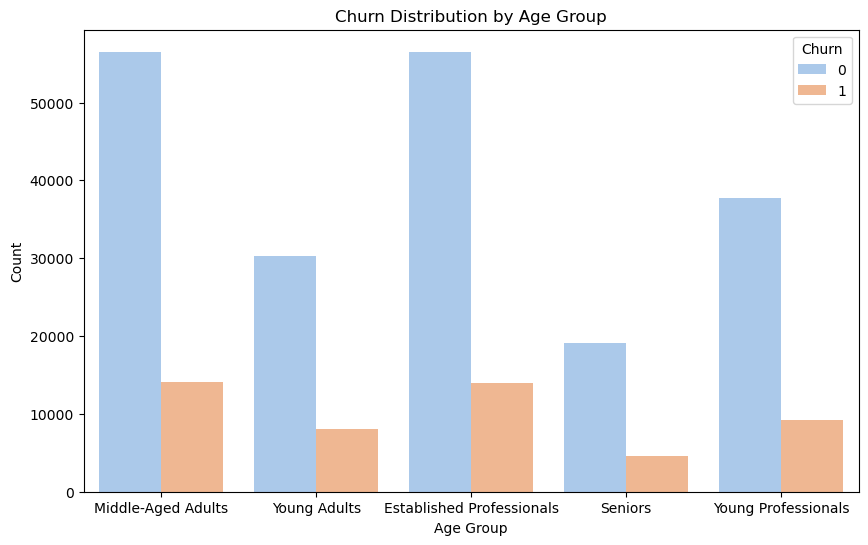

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group', hue='Churn', palette='pastel')
plt.title('Churn Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

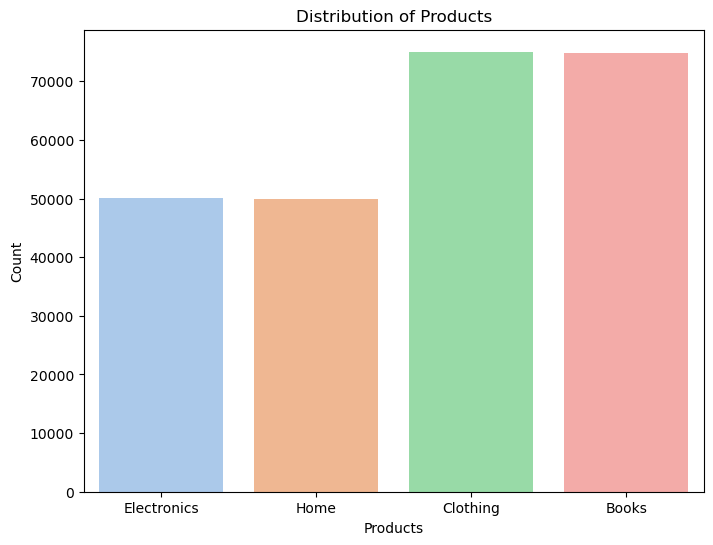

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Product Category', palette='pastel')
plt.title('Distribution of Products')
plt.xlabel('Products')
plt.ylabel('Count')
plt.show()

**Gender Analysis**
- Explored gender distribution among customers and within product categories.

In [29]:
unique_customers = df.drop_duplicates(subset=["Customer ID"])

In [30]:
gender_count = unique_customers["Gender"].value_counts()
print(gender_count)

Female    24958
Male      24715
Name: Gender, dtype: int64


In [31]:
sns.set_style("whitegrid")

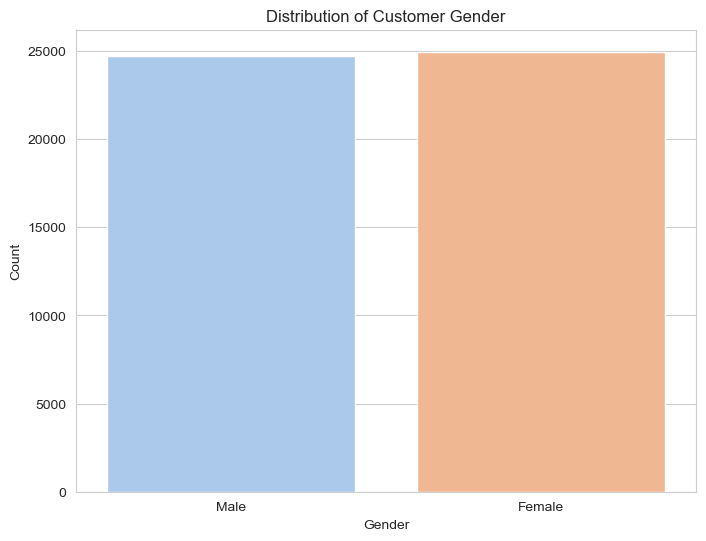

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=unique_customers, x='Gender', palette='pastel')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**The total count of unique customers is 24,958 (Female) + 24,715 (Male) = 49,673.**

In [34]:
gender_analysis = df.groupby("Product Category")["Gender"].value_counts() 
gender_analysis

Product Category  Gender
Books             Female    37473
                  Male      37439
Clothing          Female    37946
                  Male      37106
Electronics       Female    25128
                  Male      25057
Home              Female    25013
                  Male      24838
Name: Gender, dtype: int64

Text(0, 0.5, 'Count')

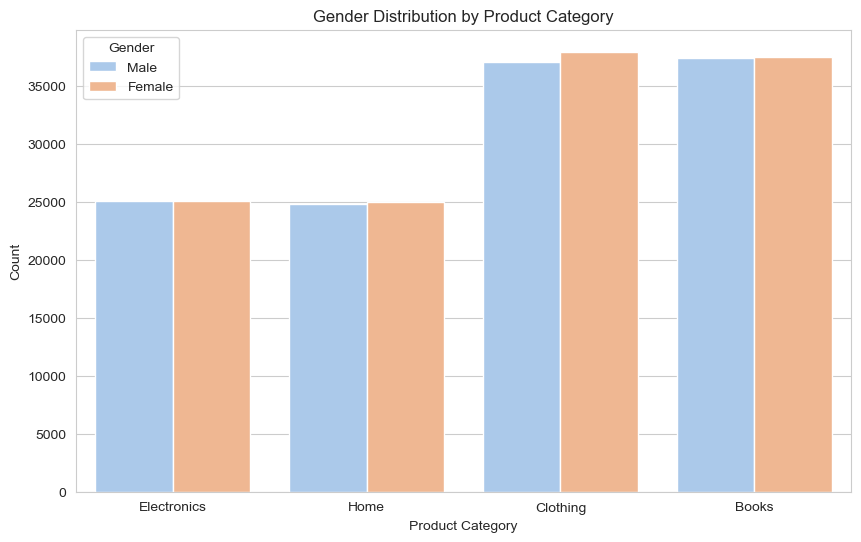

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Product Category",  hue='Gender', palette='pastel')
plt.title('Gender Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')

#### Books:
The count of male and female customers is almost equal, indicating a balanced gender distribution. Books seem to appeal to both male and female customers equally.

#### Clothing:
There are slightly more female customers compared to male customers in the clothing category. This suggests that clothing products might have designs or styles that are more appealing to female customers.

#### Electronics:
The gender distribution in the electronics category is relatively balanced, with a slightly higher count of female customers. This indicates that electronic products attract customers from both genders.

#### Home:
Similar to electronics, the gender distribution in the home category is also balanced, with a slightly higher count of male customers. This suggests that home-related products appeal to a diverse customer base.


**Age Group Analysis**

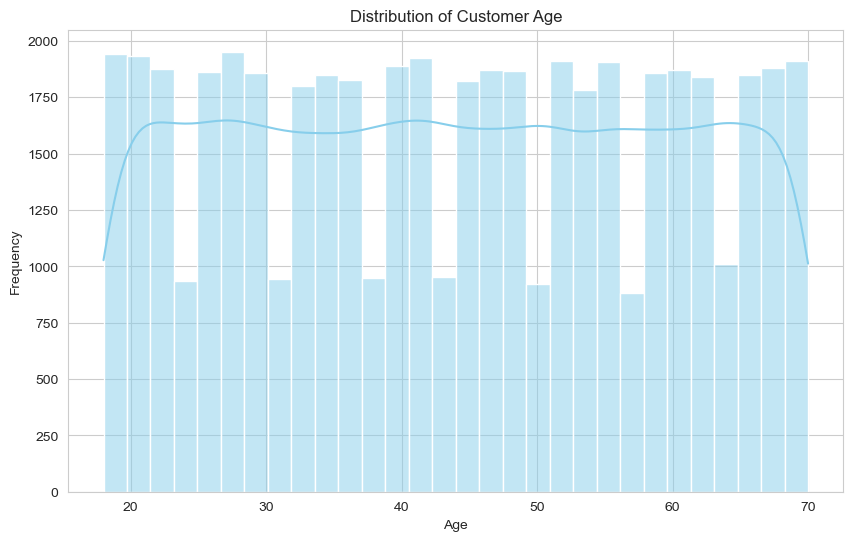

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(data=unique_customers, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [38]:
age_grp = df.groupby("Product Category")["Age Group"].value_counts() 
age_grp

Product Category  Age Group                
Books             Middle-Aged Adults           21231
                  Established Professionals    21034
                  Young Professionals          14060
                  Young Adults                 11419
                  Seniors                       7168
Clothing          Middle-Aged Adults           21202
                  Established Professionals    21071
                  Young Professionals          14132
                  Young Adults                 11614
                  Seniors                       7033
Electronics       Established Professionals    14245
                  Middle-Aged Adults           14177
                  Young Professionals           9283
                  Young Adults                  7734
                  Seniors                       4746
Home              Middle-Aged Adults           14054
                  Established Professionals    14045
                  Young Professionals           9431
  

Text(0, 0.5, 'Count')

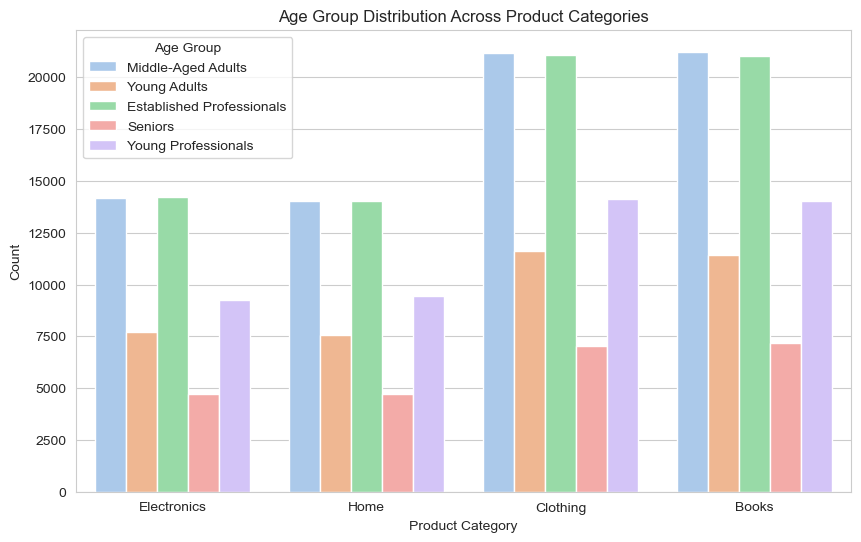

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Product Category",  hue='Age Group', palette='pastel')
plt.title('Age Group Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')

#### Middle-aged adults and established professionals:
Middle-aged adults and established professionals buy the most across all types of products, showing they have the most spending power and are actively involved in shopping across different markets.

#### Young Professionals:
While young professionals have relatively lower purchase numbers compared to middle-aged adults and established professionals, they still show considerable engagement across all product categories, suggesting a growing consumer segment with potential for market expansion.

#### Young Adults and Seniors:
Young adults and seniors exhibit lower purchase numbers compared to other age groups, indicating potential areas for targeted marketing strategies or product development to better cater to these demographics.


In [41]:
df

,Customer ID,Customer Name,Age,Gender,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Churn,Age Group
0,46251,Christine Hernandez,37,Male,2020-08-09 09:38:00,Electronics,12,3,740,Credit Card,0.0,0,Middle-Aged Adults
1,46251,Christine Hernandez,37,Male,2022-05-03 12:56:00,Home,468,4,2739,PayPal,0.0,0,Middle-Aged Adults
2,46251,Christine Hernandez,37,Male,2022-05-23 18:18:00,Home,288,2,3196,PayPal,0.0,0,Middle-Aged Adults
3,46251,Christine Hernandez,37,Male,2020-12-11 13:13:00,Clothing,196,1,3509,PayPal,0.0,0,Middle-Aged Adults
4,13593,James Grant,49,Female,2020-11-27 17:55:00,Home,449,1,3452,Credit Card,0.0,1,Middle-Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,Michelle Flores,55,Male,2023-10-08 13:39:00,Clothing,279,2,2187,PayPal,1.0,1,Established Professionals
249996,48835,Jeremy Rush,42,Female,2021-11-23 01:30:00,Home,27,1,3615,Credit Card,1.0,1,Middle-Aged Adults
249997,21019,Tina Craig,41,Male,2020-02-07 14:04:00,Home,17,5,2466,Cash,0.0,0,Middle-Aged Adults
249998,49234,Jennifer Cooper,34,Female,2020-12-30 02:02:00,Books,398,2,3668,Crypto,0.0,1,Young Professionals


**Return Analysis**

- Investigated return rates across product categories.

In [42]:
return_distribution = df['Returns'].value_counts(normalize=True)
return_distribution

0.0    0.596924
1.0    0.403076
Name: Returns, dtype: float64

**Non-Returns (0.0):** Approximately 59.69% of transactions in the dataset did not involve any returns.<br>
**Returns (1.0):** Around 40.31% of transactions in the dataset resulted in returns.

In [44]:
return_frequency = df.groupby('Product Category')['Returns'].value_counts()
print(return_frequency)

Product Category  Returns
Books             0.0        44683
                  1.0        30229
Clothing          0.0        44930
                  1.0        30122
Electronics       0.0        29914
                  1.0        20271
Home              0.0        29704
                  1.0        20147
Name: Returns, dtype: int64


In [45]:
return_frequency = df.groupby('Product Category')['Returns'].mean() * 100
return_frequency = return_frequency.sort_values(ascending=False)
print(return_frequency)

Product Category
Home           40.414435
Electronics    40.392548
Books          40.352680
Clothing       40.134840
Name: Returns, dtype: float64


#### Home Products:
Approximately 40.41% of purchases in the "Home" category result in returns.

#### Electronics:
Around 40.39% of purchases in the "Electronics" category result in returns.

#### Books:
Roughly 40.35% of purchases in the "Books" category result in returns.

#### Clothing:
Approximately 40.13% of purchases in the "Clothing" category result in returns.

These findings suggest that return rates are relatively consistent across different product categories, with all categories experiencing return rates around 40%.


In [47]:
df

,Customer ID,Customer Name,Age,Gender,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Churn,Age Group
0,46251,Christine Hernandez,37,Male,2020-08-09 09:38:00,Electronics,12,3,740,Credit Card,0.0,0,Middle-Aged Adults
1,46251,Christine Hernandez,37,Male,2022-05-03 12:56:00,Home,468,4,2739,PayPal,0.0,0,Middle-Aged Adults
2,46251,Christine Hernandez,37,Male,2022-05-23 18:18:00,Home,288,2,3196,PayPal,0.0,0,Middle-Aged Adults
3,46251,Christine Hernandez,37,Male,2020-12-11 13:13:00,Clothing,196,1,3509,PayPal,0.0,0,Middle-Aged Adults
4,13593,James Grant,49,Female,2020-11-27 17:55:00,Home,449,1,3452,Credit Card,0.0,1,Middle-Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,Michelle Flores,55,Male,2023-10-08 13:39:00,Clothing,279,2,2187,PayPal,1.0,1,Established Professionals
249996,48835,Jeremy Rush,42,Female,2021-11-23 01:30:00,Home,27,1,3615,Credit Card,1.0,1,Middle-Aged Adults
249997,21019,Tina Craig,41,Male,2020-02-07 14:04:00,Home,17,5,2466,Cash,0.0,0,Middle-Aged Adults
249998,49234,Jennifer Cooper,34,Female,2020-12-30 02:02:00,Books,398,2,3668,Crypto,0.0,1,Young Professionals


**Monthly Purchase Patterns**

- Explored purchase patterns over months to identify seasonal trends.

In [48]:
monthly_patterns = df.groupby(df["Purchase Date"].dt.month)["Product Category"].value_counts()

In [49]:
monthly_patterns

Purchase Date  Product Category
1              Clothing            6668
               Books               6656
               Electronics         4486
               Home                4431
2              Clothing            6196
               Books               6170
               Home                4089
               Electronics         4016
3              Books               6681
               Clothing            6665
               Home                4496
               Electronics         4451
4              Clothing            6485
               Books               6446
               Electronics         4402
               Home                4327
5              Clothing            6830
               Books               6583
               Electronics         4454
               Home                4391
6              Clothing            6533
               Books               6503
               Electronics         4283
               Home                4197
7       

#### January (Month 1):
- The most purchased categories are Clothing and Books, followed by Electronics and Home products.

#### February (Month 2):
- Similar to January, Clothing and Books are the top categories in terms of purchases, followed by Home and Electronics.

#### March (Month 3):
- Books and Clothing remain the most purchased categories, with Electronics and Home products following closely.

#### April (Month 4):
- Clothing and Books continue to lead in purchases, followed by Electronics and Home products.

#### May (Month 5):
- Clothing maintains its position as the most purchased category, followed by Books, Electronics, and Home products.

#### June (Month 6):
- Similar to May, Clothing remains the most purchased category, followed by Books, Electronics, and Home products.

#### July (Month 7):
- Clothing and Books are still the top categories in terms of purchases, followed by Home and Electronics.

#### August (Month 8):
- Books and Clothing continue to be the most purchased categories, followed by Electronics and Home products.

#### September (Month 9):
- Books and Clothing remain the most purchased categories, followed by Electronics and Home products.

#### October (Month 10):
- Clothing is the most purchased category, followed by Books, Home, and Electronics.

#### November (Month 11):
- Books and Clothing are the top categories in terms of purchases, followed by Electronics and Home products.

#### December (Month 12):
- Similar to November, Books and Clothing lead in purchases, followed by Home and Electronics.


In [50]:
df.head()

,Customer ID,Customer Name,Age,Gender,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Churn,Age Group
0,46251,Christine Hernandez,37,Male,2020-08-09 09:38:00,Electronics,12,3,740,Credit Card,0.0,0,Middle-Aged Adults
1,46251,Christine Hernandez,37,Male,2022-05-03 12:56:00,Home,468,4,2739,PayPal,0.0,0,Middle-Aged Adults
2,46251,Christine Hernandez,37,Male,2022-05-23 18:18:00,Home,288,2,3196,PayPal,0.0,0,Middle-Aged Adults
3,46251,Christine Hernandez,37,Male,2020-12-11 13:13:00,Clothing,196,1,3509,PayPal,0.0,0,Middle-Aged Adults
4,13593,James Grant,49,Female,2020-11-27 17:55:00,Home,449,1,3452,Credit Card,0.0,1,Middle-Aged Adults


**Payment Method Analysis**

- Investigated the distribution of payment methods across product categories.

In [51]:
df["Payment Method"].value_counts()

Credit Card    100486
PayPal          74837
Cash            49894
Crypto          24783
Name: Payment Method, dtype: int64

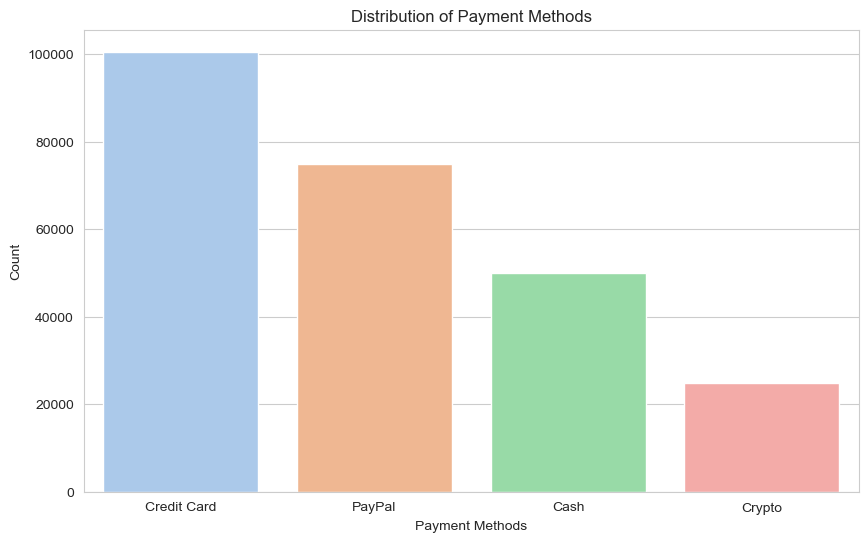

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Payment Method"].value_counts().index, y=df["Payment Method"].value_counts(), palette="pastel")
plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Methods")
plt.ylabel("Count")
plt.show()

In [53]:
product_payment = df.groupby("Product Category")["Payment Method"].value_counts()
product_payment

Product Category  Payment Method
Books             Credit Card       30079
                  PayPal            22424
                  Cash              14962
                  Crypto             7447
Clothing          Credit Card       30257
                  PayPal            22297
                  Cash              15049
                  Crypto             7449
Electronics       Credit Card       20193
                  PayPal            15034
                  Cash               9996
                  Crypto             4962
Home              Credit Card       19957
                  PayPal            15082
                  Cash               9887
                  Crypto             4925
Name: Payment Method, dtype: int64

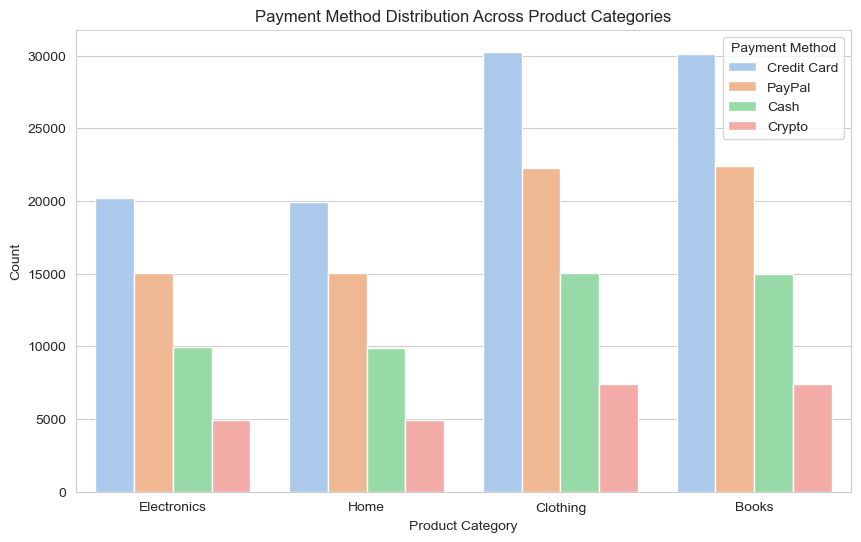

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Product Category",hue="Payment Method",palette="pastel")
plt.title("Payment Method Distribution Across Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.legend(title="Payment Method")
plt.show()

# Customer Segmentation/RFM Analysis

- Recency, Frequency, Monetary Value (RFM) Segmentation
      - Utilized RFM analysis to segment customers based on recency, frequency, and monetary value scores.

- K-means Clustering
       - Applied K-means clustering to identify distinct customer segments.

In [55]:
current_date = max(df['Purchase Date'])
recency_data = df.groupby('Customer ID')['Purchase Date'].max().reset_index()
recency_data.columns = ['Customer ID', 'LastPurchaseDate']
recency_data['Recency'] = (current_date - recency_data['LastPurchaseDate']).dt.days

In [56]:
frequency_data = df.groupby('Customer ID')['Purchase Date'].count().reset_index()
frequency_data.columns = ['Customer ID', 'Frequency']

In [57]:
monetary_value_data = df.groupby('Customer ID')['Total Purchase Amount'].sum().reset_index()
monetary_value_data.columns = ['Customer ID', 'Monetary Value']

In [58]:
rfm_data = pd.merge(recency_data, frequency_data, on='Customer ID')
rfm_data = pd.merge(rfm_data, monetary_value_data, on='Customer ID')

In [59]:
rfm_data['RecencyScore'] = pd.qcut(rfm_data['Recency'], q=5, labels=False)
rfm_data['FrequencyScore'] = pd.qcut(rfm_data['Frequency'], q=5, labels=False)
rfm_data['MonetaryValueScore'] = pd.qcut(rfm_data['Monetary Value'], q=5, labels=False)

In [60]:
rfm_data['RFM_Score'] = rfm_data['RecencyScore'] + rfm_data['FrequencyScore'] + rfm_data['MonetaryValueScore']

In [61]:
rfm_data

,Customer ID,LastPurchaseDate,Recency,Frequency,Monetary Value,RecencyScore,FrequencyScore,MonetaryValueScore,RFM_Score
0,1,2023-07-19 19:09:00,143,1,3491,1,0,0,1
1,2,2022-11-21 06:48:00,383,3,7988,3,0,1,4
2,3,2023-06-18 12:31:00,174,8,22587,1,4,4,9
3,4,2023-12-05 10:50:00,4,4,8715,0,1,1,2
4,5,2023-03-28 13:30:00,256,8,12524,2,4,2,8
...,...,...,...,...,...,...,...,...,...
49668,49996,2022-12-18 00:46:00,356,4,14044,3,1,2,6
49669,49997,2023-07-28 07:16:00,134,8,22431,1,4,4,9
49670,49998,2023-04-09 05:33:00,244,4,8610,2,1,1,4
49671,49999,2022-07-22 19:07:00,505,2,6984,3,0,0,3


In [62]:
rfm_data.describe()

,Customer ID,Recency,Frequency,Monetary Value,RecencyScore,FrequencyScore,MonetaryValueScore,RFM_Score
count,49673.000000,49673.000000,49673.000000,49673.000000,49673.000000,49673.000000,49673.000000,49673.000000
mean,24991.166489,331.591287,5.032915,13716.559962,1.997685,1.824271,1.999940,5.821895
std,14432.765110,257.994028,2.206427,6840.208557,1.414333,1.406098,1.414263,2.588945
min,1.000000,0.000000,1.000000,110.000000,0.000000,0.000000,0.000000,0.000000
25%,12491.000000,141.000000,3.000000,8719.000000,1.000000,0.000000,1.000000,4.000000
50%,24984.000000,260.000000,5.000000,13026.000000,2.000000,2.000000,2.000000,6.000000
75%,37489.000000,454.000000,6.000000,17966.000000,3.000000,3.000000,3.000000,8.000000
max,50000.000000,1438.000000,17.000000,55339.000000,4.000000,4.000000,4.000000,12.000000


In [63]:
rfm_data

,Customer ID,LastPurchaseDate,Recency,Frequency,Monetary Value,RecencyScore,FrequencyScore,MonetaryValueScore,RFM_Score
0,1,2023-07-19 19:09:00,143,1,3491,1,0,0,1
1,2,2022-11-21 06:48:00,383,3,7988,3,0,1,4
2,3,2023-06-18 12:31:00,174,8,22587,1,4,4,9
3,4,2023-12-05 10:50:00,4,4,8715,0,1,1,2
4,5,2023-03-28 13:30:00,256,8,12524,2,4,2,8
...,...,...,...,...,...,...,...,...,...
49668,49996,2022-12-18 00:46:00,356,4,14044,3,1,2,6
49669,49997,2023-07-28 07:16:00,134,8,22431,1,4,4,9
49670,49998,2023-04-09 05:33:00,244,4,8610,2,1,1,4
49671,49999,2022-07-22 19:07:00,505,2,6984,3,0,0,3


In [64]:
numerical_features = rfm_data[['RecencyScore', 'FrequencyScore', 'MonetaryValueScore']]

scaler = StandardScaler()
normalized_features = scaler.fit_transform(numerical_features)

k = 3  

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(normalized_features)


cluster_labels = kmeans.labels_ # contains the cluster labels assigned to each data point after fitting the model.

rfm_data['Cluster'] = cluster_labels

In [65]:
cluster_centers = kmeans.cluster_centers_ # stores the centroid coordinates of each cluster obtained after fitting the k-means clustering model.
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} Center:")
    print("RecencyScore:", center[0])
    print("FrequencyScore:", center[1])
    print("MonetaryValueScore:", center[2])
    print()

Cluster 1 Center:
RecencyScore: -0.375346626672542
FrequencyScore: 0.9666744279316578
MonetaryValueScore: 0.9601703398977374

Cluster 2 Center:
RecencyScore: -0.6504311638383707
FrequencyScore: -0.6049984387392957
MonetaryValueScore: -0.6418208482611598

Cluster 3 Center:
RecencyScore: 1.1295456719844894
FrequencyScore: -0.8057993093781349
MonetaryValueScore: -0.7626568256711805



#### Cluster 1:
This cluster has relatively low recency score but high frequency and monetary value scores, indicating customers who have made recent purchases and are highly engaged, making frequent and high-value transactions.

#### Cluster 2:
This cluster has low scores across all dimensions, indicating customers with low recency, frequency, and monetary value, potentially representing less engaged or dormant customers.

#### Cluster 3:
This cluster has high recency score but low frequency and monetary value scores, suggesting customers who haven't made recent purchases and have low engagement levels.


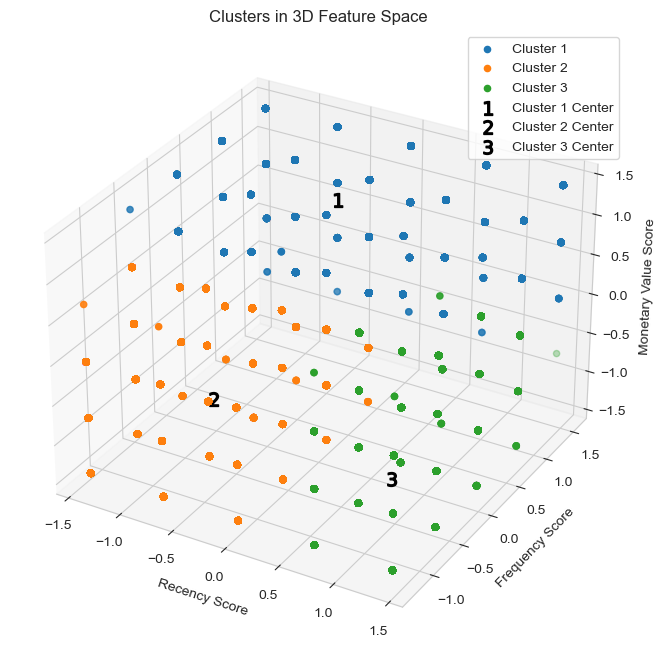

In [66]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(k):
    cluster_data = normalized_features[cluster_labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster+1}')

for i, center in enumerate(cluster_centers):
    ax.scatter(center[0], center[1], center[2], c='black', s=100, marker=f"${i+1}$", label=f'Cluster {i+1} Center')

ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Value Score')
ax.set_title('Clusters in 3D Feature Space')

ax.legend()
plt.show()


In [67]:
rfm_data

,Customer ID,LastPurchaseDate,Recency,Frequency,Monetary Value,RecencyScore,FrequencyScore,MonetaryValueScore,RFM_Score,Cluster
0,1,2023-07-19 19:09:00,143,1,3491,1,0,0,1,1
1,2,2022-11-21 06:48:00,383,3,7988,3,0,1,4,2
2,3,2023-06-18 12:31:00,174,8,22587,1,4,4,9,0
3,4,2023-12-05 10:50:00,4,4,8715,0,1,1,2,1
4,5,2023-03-28 13:30:00,256,8,12524,2,4,2,8,0
...,...,...,...,...,...,...,...,...,...,...
49668,49996,2022-12-18 00:46:00,356,4,14044,3,1,2,6,2
49669,49997,2023-07-28 07:16:00,134,8,22431,1,4,4,9,0
49670,49998,2023-04-09 05:33:00,244,4,8610,2,1,1,4,1
49671,49999,2022-07-22 19:07:00,505,2,6984,3,0,0,3,2


In [68]:
rfm_data["Cluster"].value_counts()

0    21025
2    14902
1    13746
Name: Cluster, dtype: int64

In [69]:
df

,Customer ID,Customer Name,Age,Gender,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Churn,Age Group
0,46251,Christine Hernandez,37,Male,2020-08-09 09:38:00,Electronics,12,3,740,Credit Card,0.0,0,Middle-Aged Adults
1,46251,Christine Hernandez,37,Male,2022-05-03 12:56:00,Home,468,4,2739,PayPal,0.0,0,Middle-Aged Adults
2,46251,Christine Hernandez,37,Male,2022-05-23 18:18:00,Home,288,2,3196,PayPal,0.0,0,Middle-Aged Adults
3,46251,Christine Hernandez,37,Male,2020-12-11 13:13:00,Clothing,196,1,3509,PayPal,0.0,0,Middle-Aged Adults
4,13593,James Grant,49,Female,2020-11-27 17:55:00,Home,449,1,3452,Credit Card,0.0,1,Middle-Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,Michelle Flores,55,Male,2023-10-08 13:39:00,Clothing,279,2,2187,PayPal,1.0,1,Established Professionals
249996,48835,Jeremy Rush,42,Female,2021-11-23 01:30:00,Home,27,1,3615,Credit Card,1.0,1,Middle-Aged Adults
249997,21019,Tina Craig,41,Male,2020-02-07 14:04:00,Home,17,5,2466,Cash,0.0,0,Middle-Aged Adults
249998,49234,Jennifer Cooper,34,Female,2020-12-30 02:02:00,Books,398,2,3668,Crypto,0.0,1,Young Professionals


# Conclusion

**The analysis of customer behavior in the e-commerce platform reveals several important insights:**

**Customer Demographics:** The customer base is diverse in terms of age and gender, with a significant portion of middle-aged adults and established professionals being the primary purchasers.

**Product Preferences:** Clothing and Books are consistently popular categories among customers, while Electronics and Home products also garner significant attention.

**Churn Analysis:** Approximately 20% of customers have churned, with potential factors including product satisfaction, market trends, competitive landscape, and customer expectations.

**Return Patterns:** Return rates are relatively consistent across product categories, with around 40% of purchases resulting in returns, suggesting the need for improved product quality or customer experience.

**Payment Methods:** The majority of transactions are conducted through electronic payment methods, indicating a preference for convenience and security.

**Monthly Purchase Patterns:** Purchase patterns exhibit seasonality, with certain product categories experiencing fluctuations in demand across different months.

# Strategy Recommendations Based on Analysis Results

### 1. Product Category Focus:

#### a. Clothing Category:
**Observation:** Clothing category shows a slightly higher churn rate compared to other categories. <br>

**Strategy:**
- Introduce trendy and fashionable clothing lines to attract younger demographics.
- Implement a hassle-free return policy with free return shipping to boost customer confidence in purchasing clothing items online.

#### b. Home Category:
**Observation:** Home category exhibits the highest churn rate among all product categories. <br>

**Strategy:**
- Conduct customer surveys to identify pain points and preferences within the home category.
- Enhance product descriptions and images to provide a clearer understanding of home products' features and benefits.
- Offer extended warranties or installation services to add value and differentiate from competitors.

### 2. Payment Method Optimization:

#### a. Payment Preferences:
**Observation:** Majority of customers prefer credit/debit card payments. <br>

**Strategy:**
- Partner with payment gateway providers to ensure seamless and secure credit/debit card transactions.
- Explore integration with popular digital wallets such as PayPal, Apple Pay, and Google Pay to cater to diverse payment preferences.

### 3. Customer Segmentation:

#### a. Age Group Analysis:
**Observation:** Middle-aged adults and established professionals are the most active purchasers across all product categories.<br>

**Strategy:**
- Tailor marketing campaigns and product recommendations to resonate with the preferences and lifestyles of middle-aged adults and professionals.
- Create targeted promotions for younger demographics (e.g., students, young professionals) to increase engagement and retention.

#### b. Gender Analysis:
**Observation:** Female customers slightly outnumber male customers in the clothing category.<br>

**Strategy:**
- Collaborate with fashion influencers and bloggers to showcase clothing products and engage with female customers on social media platforms.
- Launch gender-specific marketing campaigns highlighting unique product offerings and promotions.

### 4. Return Management:

#### a. Return Rate:
**Observation:** Return rates are consistent across all product categories, indicating a universal challenge. <br>

**Strategy:**
- Implement a comprehensive return management system with automated return labels and streamlined processing to minimize return-related costs and enhance customer experience.
- Provide proactive customer support to address product-related queries and concerns, reducing the likelihood of returns due to dissatisfaction.

### 5. Monthly Purchase Patterns:

#### a. Seasonal Promotions:
**Observation:** Purchase patterns vary across months, with certain categories experiencing higher demand during specific seasons. <br>

**Strategy:**
- Plan targeted promotions and seasonal discounts based on historical purchase patterns to capitalize on peak demand periods.
- Offer limited-time promotions and exclusive bundles aligned with seasonal themes and festivities to drive impulse purchases.

### 6. Customer Loyalty:

#### a. RFM Analysis:

**Observation:**
- Customers in Cluster 1 demonstrate high engagement and value, presenting opportunities for loyalty program enrollment.
- Cluster 2 consists of customers with low scores across all dimensions, indicating less engaged or dormant customers.
- Cluster 3 comprises customers with high recency scores but low frequency and monetary value scores, suggesting inactive recent customers.
<br>
**Strategy:**

#### Cluster 1 (High Engagement, High Value):
- Launch a tiered loyalty program offering rewards, discounts, and VIP perks to incentivize repeat purchases and foster long-term customer relationships.
- Personalize loyalty rewards based on RFM segmentation to recognize and reward high-value customers for their continued patronage.

#### Cluster 2 (Low Engagement, Low Value):
- Implement re-engagement campaigns targeting dormant customers with personalized incentives, such as exclusive discounts or limited-time offers.
- Offer value-added services or product recommendations based on past purchase history to reignite interest and encourage repeat purchases.

#### Cluster 3 (Recent but Inactive):
- Deploy targeted promotional campaigns to encourage recent customers to make subsequent purchases.
- Provide incentives, such as free shipping or gift cards, to prompt immediate action and drive conversion among recently inactive customers.
- Leverage personalized recommendations and product bundles to re-engage customers and highlight relevant offerings based on past interactions.



#### In conclusion, the insights we've gained from our analysis provide valuable direction for optimizing our e-commerce operations. By understanding our customers' demographics, preferences, and behaviors, we can tailor our offerings to better serve their needs. The strategies we've outlined, such as prioritizing popular product categories and optimizing payment methods, are essential for improving customer satisfaction, reducing churn, and driving revenue growth. Moving forward, it's crucial to remain adaptable and responsive to changes in the market, using data-driven approaches to continuously refine our strategies and maintain our competitive edge in the e-commerce landscape. By prioritizing customer-centricity and innovation, we can position our business for long-term success and deliver exceptional value to our customers. 

# Thank you!